# MVP Análise de Dados e Boas Práticas
Nome: Elvio

Matrícula:

Dataset: Wether

## Descrição do Problema
Ele oferece mais de 40 variáveis metereologicas, incluindo temperatura, vento, pressão, precipitação, umidade, visibilidade, medições de qualidade do ar e muito mais. O conjunto de dados é valioso para analisar padrões climáticos globais.

# Hipóteses do Problema

As hipóteses levantadas para esta análise são:

- Qual continente sofreu a maior variação de temperatura?

- Qual estação climática é mais afetada com as mudanças de temperatura?

- Qual a previsão de temperatura para o Brasil para o ano de 2030?

## Tipo de Problema

Este é um problema de **predição**. Dado um conjunto de

# Seleção de Dados
O conjunto de dados foi obtido pelo Kaggle chamado World Weather Repository ( Daily Updating ) e é atualizado diariamente fornecendo uma base de dados para estudos climáticos.


## Atributos do Dataset

**Contem mais de 78136 medições de 41 parâmetros climáticos, que são:**

País: Nome do país onde os dados meteorológicos foram registrados.

Nome da Localização: Cidade ou local de referência da medição.

Latitude: Coordenada geográfica norte-sul da localização.

Longitude: Coordenada geográfica leste-oeste da localização.

Fuso Horário: Zona de tempo correspondente à localidade.

Última Atualização - Epoch: Data e hora da última atualização no formato epoch (segundos desde 1970).

Última Atualização: Data e hora da última atualização no formato padrão.

Temperatura em Celsius: Temperatura do ar em graus Celsius.

Temperatura em Fahrenheit: Temperatura do ar em graus Fahrenheit.

Condição Climática: Descrição textual do estado do tempo (ex: Ensolarado, Nublado).

Vento em mph: Velocidade do vento em milhas por hora.

Vento em km/h: Velocidade do vento em quilômetros por hora.

Direção do Vento em Graus: Direção do vento expressa em graus (0° = norte).

Direção do Vento: Direção cardinal do vento (ex: N, NE, S).

Pressão em mb: Pressão atmosférica em milibares.

Pressão em polegadas: Pressão atmosférica em polegadas de mercúrio.

Precipitação em mm: Quantidade de precipitação (chuva) em milímetros.

Precipitação em polegadas: Quantidade de precipitação em polegadas.

Umidade: Umidade relativa do ar em porcentagem.

Cobertura de Nuvens: Percentual de cobertura do céu por nuvens.

Sensação Térmica em Celsius: Temperatura aparente em °C, considerando fatores como vento e umidade.

Sensação Térmica em Fahrenheit: Temperatura aparente em °F.

Visibilidade em km: Distância de visibilidade em quilômetros.

Visibilidade em milhas: Distância de visibilidade em milhas.

Índice UV: Medida da intensidade da radiação ultravioleta do sol.

Rajada de Vento em mph: Velocidade de rajadas de vento em milhas por hora.

Rajada de Vento em km/h: Velocidade de rajadas de vento em quilômetros por hora.

Qualidade do Ar - Monóxido de Carbono: Concentração de CO no ar.

Qualidade do Ar - Ozônio: Concentração de ozônio (O₃) no ar.

Qualidade do Ar - Dióxido de Nitrogênio: Concentração de NO₂ no ar.

Qualidade do Ar - Dióxido de Enxofre: Concentração de SO₂ no ar.

Qualidade do Ar - Partículas PM2.5: Concentração de partículas muito finas no ar (menores que 2,5 micrômetros).

Qualidade do Ar - Partículas PM10: Concentração de partículas inaláveis (menores que 10 micrômetros).

Índice de Qualidade do Ar - EPA EUA: Classificação da qualidade do ar segundo a agência americana.

Índice de Qualidade do Ar - DEFRA Reino Unido: Classificação da qualidade do ar segundo o órgão britânico.

Nascer do Sol: Horário do nascer do sol.

Pôr do Sol: Horário do pôr do sol.

Nascer da Lua: Horário do nascimento da lua.

Pôr da Lua: Horário do desaparecimento da lua no horizonte.

Fase da Lua: Fase atual do ciclo lunar (ex: nova, cheia, minguante).

Iluminação da Lua: Percentual visível da lua iluminada.

# Importação das Bibliotecas Necessárias e Carga de Dados

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder


In [ ]:
# carregamento do dataset
df = pd.read_csv('/content/GlobalWeatherRepository.csv')

In [ ]:
# Primeiras linhas
df.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


# Análise de Dados
Nesta etapa de Análise Exploratória de Dados (EDA) aplicada ao conjunto de dados climáticos, buscamos compreender a distribuição, as inter-relações e os comportamentos das variáveis meteorológicas, o que é essencial para as fases posteriores de pré-processamento e modelagem preditiva.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78136 entries, 0 to 78135
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       78136 non-null  object 
 1   location_name                 78136 non-null  object 
 2   latitude                      78136 non-null  float64
 3   longitude                     78136 non-null  float64
 4   timezone                      78136 non-null  object 
 5   last_updated_epoch            78136 non-null  int64  
 6   last_updated                  78136 non-null  object 
 7   temperature_celsius           78136 non-null  float64
 8   temperature_fahrenheit        78136 non-null  float64
 9   condition_text                78136 non-null  object 
 10  wind_mph                      78136 non-null  float64
 11  wind_kph                      78136 non-null  float64
 12  wind_degree                   78136 non-null  int64  
 13  w

O conjunto de dados analisado apresenta excelente qualidade, com **nenhum valor ausente** em nenhuma das 41 variáveis registradas, o que elimina a necessidade de imputação ou exclusão de registros. As variáveis estão bem definidas em termos de tipos de dados: campos como **temperatura, umidade, pressão, velocidade do vento e índices de qualidade do ar estão armazenados como valores numéricos** (float ou int), permitindo análises estatísticas e modelagens diretas. Já informações como nomes de **países, direções do vento e fases da lua estão corretamente categorizadas como variáveis do tipo texto** (object). Além disso,** variáveis temporais como “last_updated”, “sunrise”, “sunset”, “moonrise” e “moonset”** estão em formato de string, podendo ser facilmente convertidas para datetime, se necessário. A ausência de inconsistências e a padronização dos tipos de dados tornam este dataset altamente confiável para análises descritivas, preditivas e modelagens baseadas em séries temporais.

**Como o objetivo da pesquisa é prever mudanças na temperatura filtraremos algumas colunas para dar mais objetividade ao estudo. Será mantido no dataframe as seguintes colunas:**

País: Nome do país onde os dados meteorológicos foram registrados.

Nome da Localização: Cidade ou local de referência da medição.

Última Atualização: Data e hora da última atualização no formato padrão.

Temperatura em Celsius: Temperatura do ar em graus Celsius.

Umidade: Umidade relativa do ar em porcentagem.

Sensação Térmica em Celsius: Temperatura aparente em °C, considerando fatores como vento e umidade.

Índice de Qualidade do Ar - EPA EUA: Classificação da qualidade do ar segundo a agência americana.

Deste modo vai ser possível analisar a evolução da temperatura com a evolução da sensação térmica que leva em consideração diversos fatores climáticos. A sensação térmica é a temperatura que o corpo realmente sente, e não apenas a indicada pelo termômetro. Ela varia conforme fatores como vento, umidade, radiação solar e até pressão atmosférica. Em dias frios, o vento aumenta a perda de calor da pele, reduzindo a sensação térmica (wind chill). Já em dias quentes e úmidos, o suor evapora menos, elevando a sensação de calor (índice de calor). Para estimativas mais completas, índices como o UTCI combinam todos esses elementos para calcular o conforto térmico de forma mais precisa.

In [ ]:
# cópia do dataframe original
df2 = df.copy()
#seleção das colunas
df2 = df2[['country', 'location_name', 'last_updated', 'temperature_celsius', 'feels_like_celsius']]
# transformação da coluna last_updated em datetime
df2['last_updated'] = pd.to_datetime(df2['last_updated'])


Após esse processo, foram elaborados dois gráficos do tipo histograma com curva de densidade, representando a distribuição de frequência da temperatura real e da sensação térmica. O objetivo foi visualizar como essas variáveis se distribuem e identificar padrões.

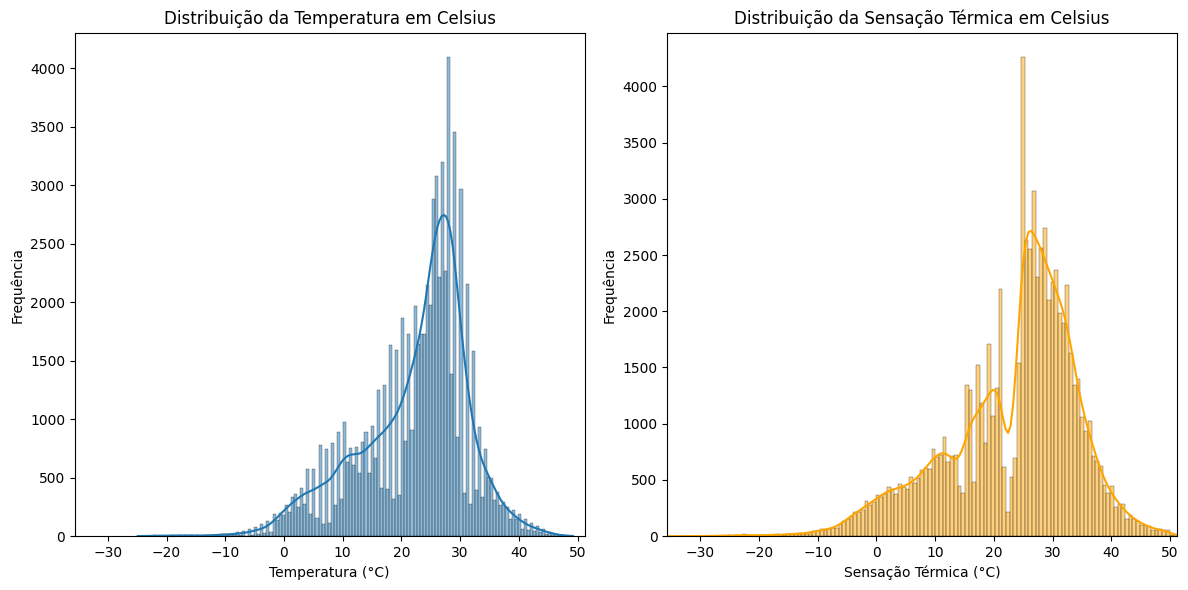

In [ ]:

# Define os limites dos eixos X com base no intervalo total das duas colunas
x_min = min(df2['temperature_celsius'].min(), df2['feels_like_celsius'].min())
x_max = max(df2['temperature_celsius'].max(), df2['feels_like_celsius'].max())
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df2['temperature_celsius'], kde=True)
plt.title('Distribuição da Temperatura em Celsius')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Frequência')
plt.xlim(x_min, x_max)

plt.subplot(1, 2, 2)
sns.histplot(df2['feels_like_celsius'], kde=True, color='orange')
plt.title('Distribuição da Sensação Térmica em Celsius')
plt.xlabel('Sensação Térmica (°C)')
plt.ylabel('Frequência')
plt.xlim(x_min, x_max)

plt.tight_layout()
plt.show()

Os gráficos mostram que ambas as variáveis apresentam uma concentração principal de dados entre 20 °C e 30 °C. No entanto, a temperatura apresenta uma curva de densidade mais definida, com um pico acentuado próximo a 25 °C. Já a sensação térmica exibe três picos distintos, aproximadamente nas temperaturas de 10 °C, 20 °C e 25 °C. Além disso, observa-se que a curva da sensação térmica possui uma cauda mais alongada, sugerindo que, em determinadas condições climáticas, o desconforto térmico pode diferir significativamente da temperatura real medida.

Para extrair informações mais relevantes dessas variáveis, foi realizada uma análise estatística descritiva, incluindo medidas como média, mediana, desvio padrão, mínimo e máximo. Essa análise permitiu compreender melhor a dispersão, tendência central e variação dos dados, fornecendo uma base sólida para interpretações mais precisas sobre o comportamento da temperatura e da sensação térmica em diferentes condições climáticas.

In [ ]:
# estatísticas descritivas básicas do dataset
df2[['temperature_celsius', 'feels_like_celsius']].describe()

,temperature_celsius,feels_like_celsius
count,78136.000000,78136.000000
mean,22.349319,23.297123
std,9.266674,11.040116
min,-24.900000,-35.600000
25%,17.100000,17.100000
50%,24.700000,25.800000
75%,28.300000,30.700000
max,49.200000,51.200000


A análise revela que consideradas 78.136 observações para cada variável, temperatura média registrada foi de aproximadamente 22,3 °C, enquanto a sensação térmica média foi ligeiramente maior, em torno de 23,3 °C. A variabilidade dos dados, representada pelo desvio padrão, é maior na sensação térmica (11,0 °C) do que na temperatura (9,3 °C), indicando que as sensações térmicas apresentaram maior dispersão. As temperaturas mínimas observadas foram bastante baixas, chegando a -24,9 °C para a temperatura e -35,6 °C para a sensação térmica, enquanto as máximas foram elevadas, atingindo 49,2 °C e 51,2 °C, respectivamente.

Para descobrir o tive com maior variação de temperatura foi desenvolvido o código abaixo que retorna o pais e as variações

In [ ]:
# Agrupar por país e calcular a variação de temperatura e sensação térmica
variacoes = df2.groupby('country').agg({
    'temperature_celsius': lambda x: x.max() - x.min(),
    'feels_like_celsius': lambda x: x.max() - x.min()
})

# Renomear as colunas para facilitar a leitura
variacoes.columns = ['variacao_temperatura', 'variacao_sensacao_termica']

# Encontrar o país com a maior variação de temperatura
pais_maior_variacao = variacoes['variacao_temperatura'].idxmax()
maior_variacao_temp = variacoes.loc[pais_maior_variacao, 'variacao_temperatura']
variacao_sensacao = variacoes.loc[pais_maior_variacao, 'variacao_sensacao_termica']

# Exibir os resultados
print(f"O país com a maior variação de temperatura é {pais_maior_variacao}.")
print(f"Variação de temperatura: {maior_variacao_temp:.2f} °C")
print(f"Variação de sensação térmica: {variacao_sensacao:.2f} °C")



O país com a maior variação de temperatura é Mongolia.
Variação de temperatura: 59.20 °C
Variação de sensação térmica: 70.20 °C


Para avaliar qual estação do ano sofreu maior variação de temperatura e sensação termica

In [ ]:
# prompt: quero um novo dataset chamado br com uma copia do df2 somente com os dados do brazil da coluna country

df_br = df2[df2['country'] == 'Brazil'].copy()

In [ ]:
df_br

,country,location_name,last_updated,temperature_celsius,feels_like_celsius
23,Brazil,Bras,2024-05-16 04:45:00,23.1,25.7
218,Brazil,Bras,2024-05-16 10:00:00,31.4,36.2
413,Brazil,Bras,2024-05-17 12:00:00,29.6,35.8
605,Brazil,Bras,2024-05-18 10:30:00,28.7,34.1
799,Brazil,Bras,2024-05-19 10:00:00,27.2,31.6
...,...,...,...,...,...
77185,Brazil,Bras,2025-06-18 05:15:00,23.2,25.4
77380,Brazil,Bras,2025-06-19 05:00:00,23.2,25.4
77575,Brazil,Bras,2025-06-20 05:00:00,22.6,24.9
77770,Brazil,Bras,2025-06-21 04:45:00,23.5,25.6
